**MNIST Handwritten Digit Classification using Neural Network**

Importing Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras datset

In [ ]:
(X_train, Y_train), (X_test, Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
(X_train.shape, Y_train.shape), (X_test.shape, Y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

Training data=60000 images

testing data= 10000 images

Images dimenssion=28*28

Grayscale's image= 1 channel

In [ ]:
# printing the 10th image

print(X_train[50])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  12  56 140 126 175 200  96   2
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 166 238 254 246 242 253 246 254  67
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184 182 146 127  70  30  45  36 215 175
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0   0   0   0   0 207 246
   14   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  5

In [ ]:
print(X_train[70].shape)

(28, 28)


2


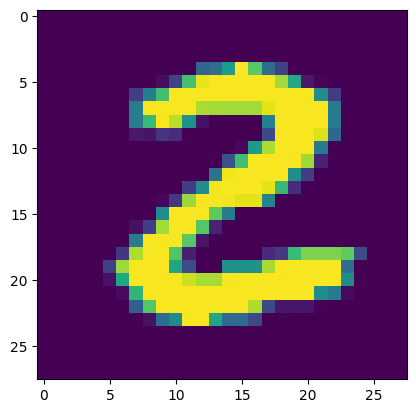

In [ ]:
# diplaying image

plt.imshow(X_train[25])

# print corresponding label
print(Y_train[25])

**Image Labels**


In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique value is Y_train
print(np.unique(Y_train))

# unique value is Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use this label as such or we can also apply onehotencoding

All the images have same dimmension in this data set if not, we have to resize all the iamges to all common dimenssion

In [ ]:
# scalling the values

X_train=X_train/255
X_test=X_test/255

In [ ]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [ ]:
from threading import active_count
# setting up the layers of the neural network

model=keras.Sequential([

                        keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(50, activation='relu'),
                        keras.layers.Dense(10,activation='sigmoid')


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# training our neural network

model.fit(X_train, Y_train, epochs=10,)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9530 - loss: 0.1566
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9664 - loss: 0.1115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9733 - loss: 0.0883
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9790 - loss: 0.0718
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9824 - loss: 0.0596
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9852 - loss: 0.0510
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9868 - loss: 0.0450
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0393
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9894 - loss: 0.0344
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9893 - loss: 0.0306


Training data accuracy is 98.9%

**Accuracy on test data**

In [ ]:
loss, accuracy=model.evaluate(X_test, Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9646 - loss: 0.1431
0.9689000248908997


 test data accuracy: 0.9646%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


2


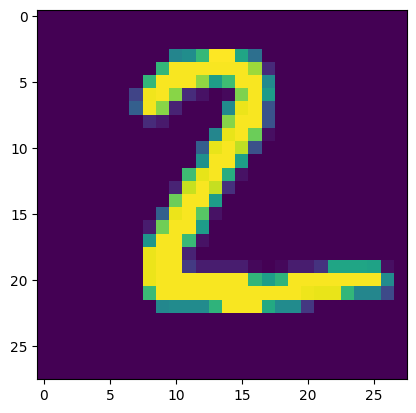

In [ ]:
# First data point in X_test

plt.imshow(X_test[1])

print(Y_test[1])

In [ ]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[6.20520860e-03 1.55451678e-04 1.22830635e-02 9.97654855e-01
 5.62614503e-07 7.43048266e-02 4.14307443e-11 9.99999642e-01
 5.23557723e-01 9.89710033e-01]


model.predict gives the prediction probability of each class for tha perticular data point

In [ ]:
# converting the prediction probability to classs label

label_for_first_test_image=np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# converting the prediction probability to classs label for all test data points
Y_pred_label=[np.argmax(i) for i in Y_pred]
print(Y_pred_label)



[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(5), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
print(Y_pred)

[[6.20520860e-03 1.55451678e-04 1.22830635e-02 ... 9.99999642e-01
  5.23557723e-01 9.89710033e-01]
 [1.34005323e-01 5.10260314e-02 9.99999940e-01 ... 7.72655495e-10
  8.74476790e-01 6.10359223e-07]
 [1.25060178e-04 9.99919593e-01 1.26215592e-02 ... 9.15353119e-01
  5.93481064e-01 1.65901184e-02]
 ...
 [2.41417001e-06 1.66600159e-07 2.56140581e-10 ... 9.34133053e-01
  7.51730502e-01 9.95733917e-01]
 [1.15110824e-05 1.63050845e-05 4.67102801e-09 ... 3.03898851e-04
  2.95222282e-01 3.45765235e-04]
 [7.71887153e-02 1.02427411e-09 1.42498678e-07 ... 1.64367464e-09
  1.21004214e-05 7.95258165e-05]]


Y_test -----> True Labels

Y_pred_Labels--> Predicted Labels

Confusion Matrix

In [ ]:
conf_mat=confusion_matrix(Y_test, Y_pred_label)
print(conf_mat)

tf.Tensor(
[[ 964    0    0    2    3    3    1    0    3    4]
 [   0 1117    2    3    1    1    2    1    6    2]
 [   5    1  990    6    1    2    4    6   16    1]
 [   0    0    6  985    0    2    1    5    3    8]
 [   2    0    2    0  961    2    7    0    1    7]
 [   1    0    1   44    1  832    4    0    8    1]
 [   2    2    0    1    4    8  940    0    1    0]
 [   1    0    7    6    3    0    0 1000    3    8]
 [   3    1    5    8    6    6    2    4  936    3]
 [   0    0    0    4   22    8    2    5    4  964]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted label')

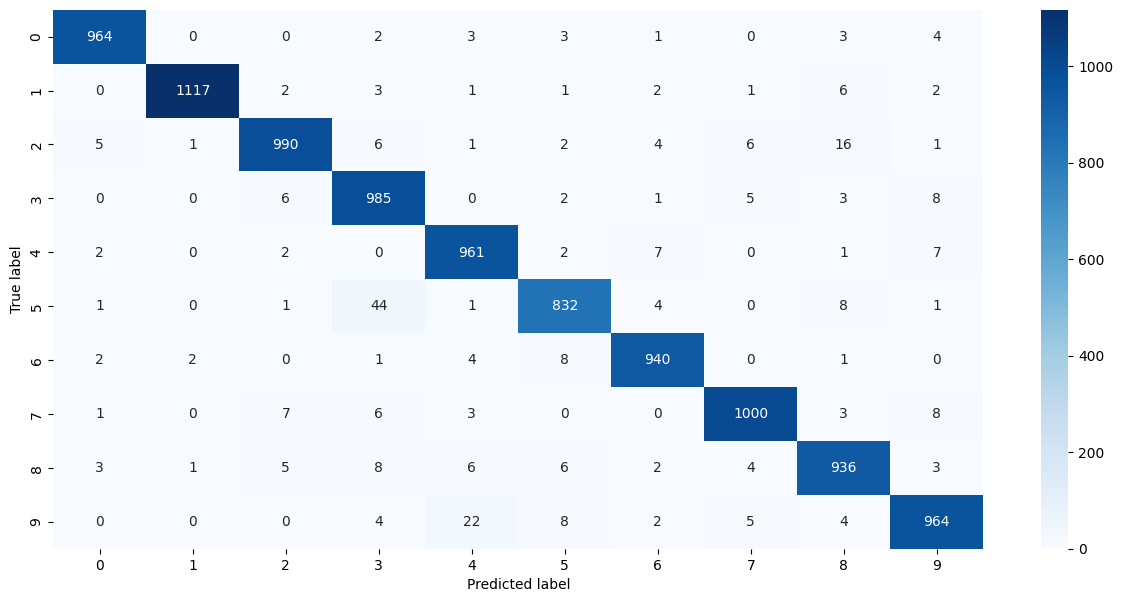

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Building a Predictive System

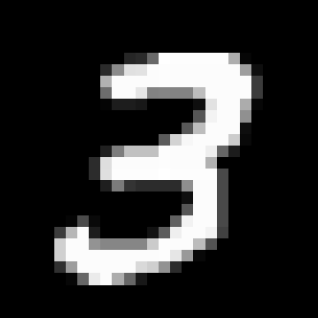

In [ ]:
input_image_path='/content/MNIST_digit.png'

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

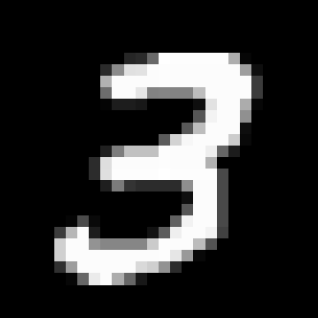

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(318, 318, 3)

In [ ]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(318, 318)

In [ ]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [ ]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[2.0971687e-13 6.0022415e-07 4.8902530e-05 1.0000000e+00 9.6321615e-20
  9.9987161e-01 1.6686953e-17 5.2692206e-04 8.5047746e-01 9.9999517e-01]]


In [ ]:
input_prediction_label=np.argmax(input_prediction)

In [ ]:
print(input_prediction_label)

3


**predictive system**

Path of the image predicted :/content/stock-photo-number-one-color-blue-icon-335796959.jpg


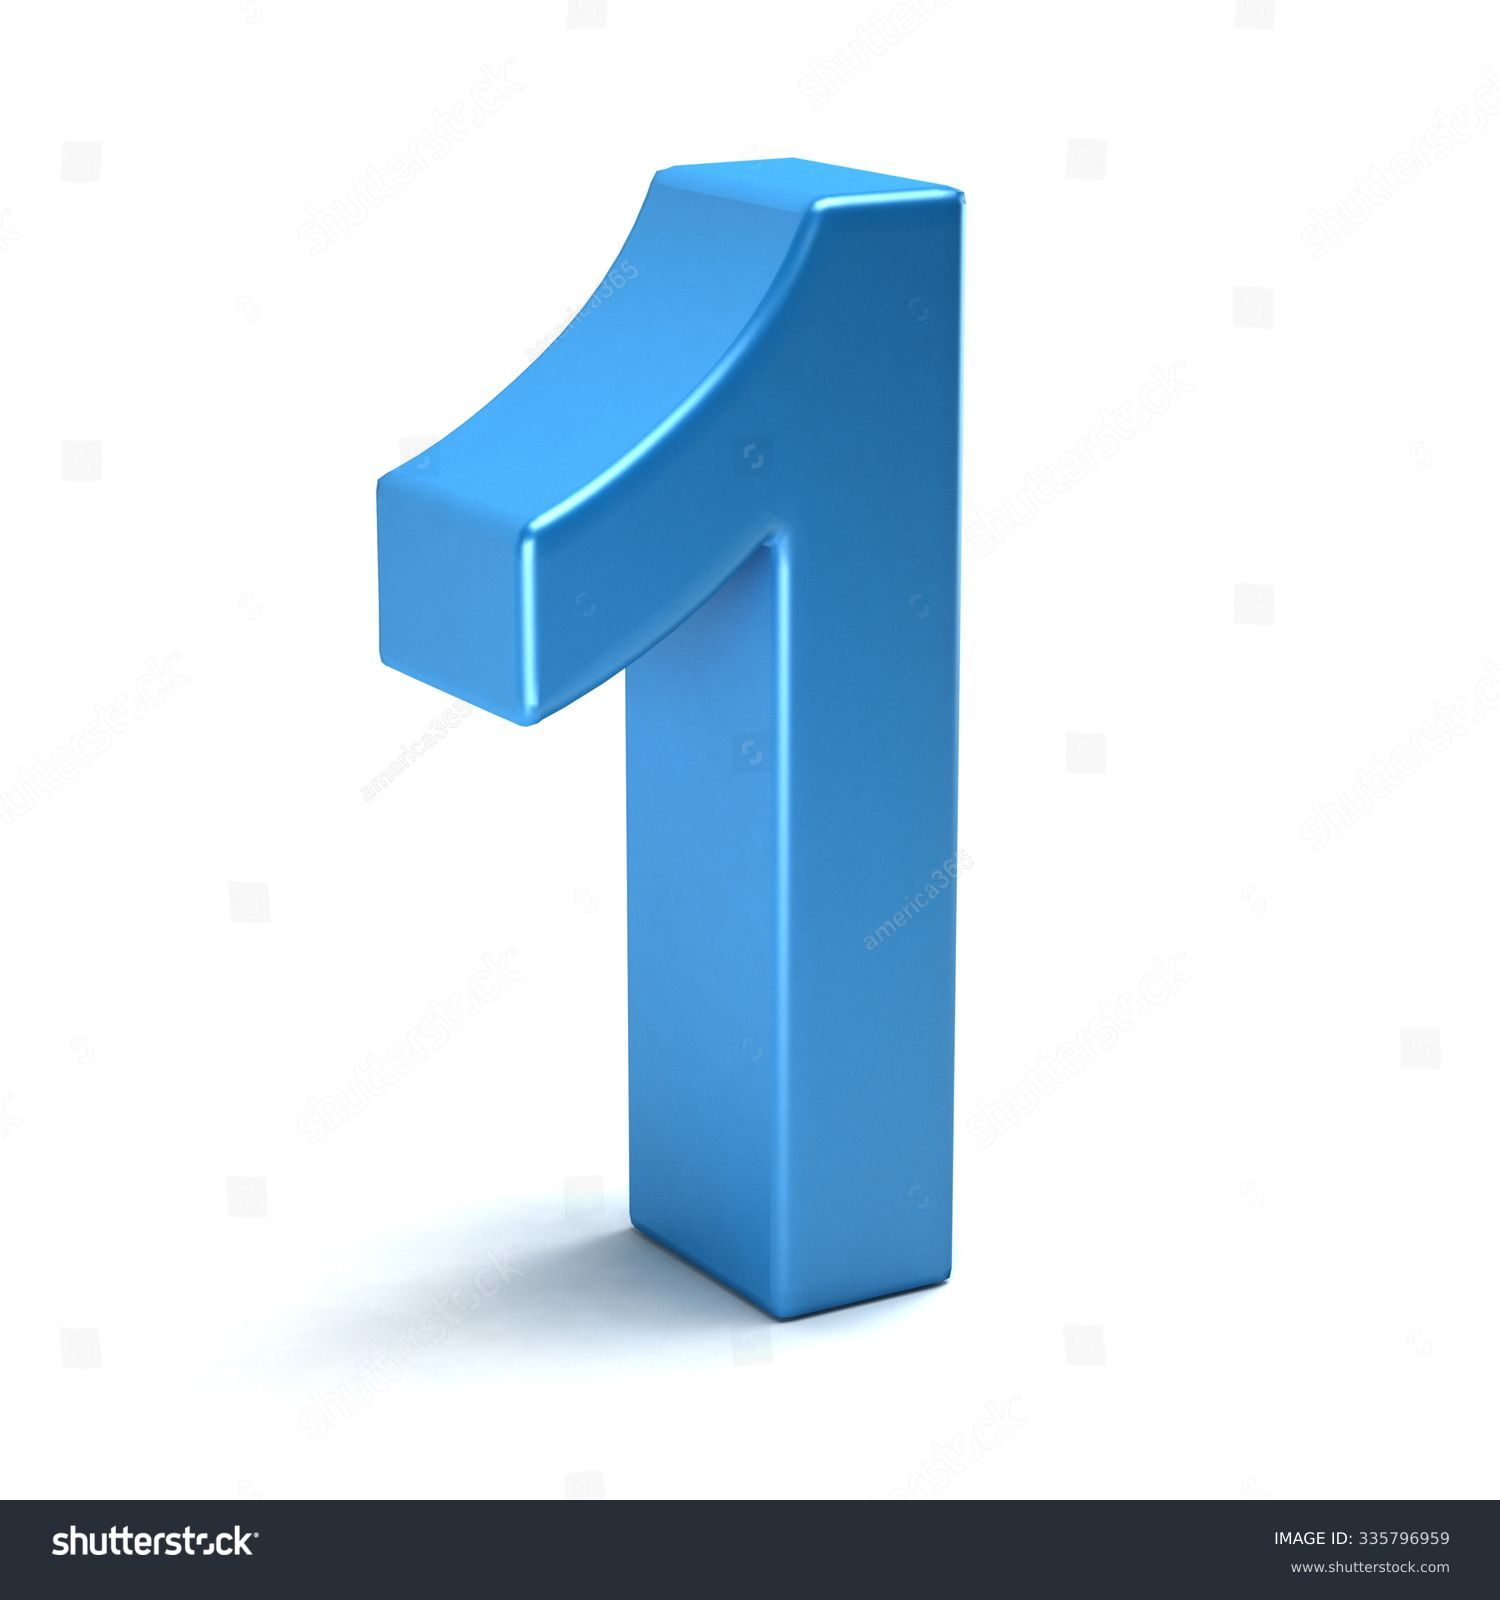

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
The Handwritten Digit is recognised as 2


In [ ]:
input_image_path=input('Path of the image predicted :')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

# Convert the image to grayscale
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Resize the image
input_image_resize=cv2.resize(grayscale,(28,28))

# Normalize the pixel values
input_image_resize=input_image_resize/255

# Reshape the image for prediction
image_reshaped=np.reshape(input_image_resize,[1,28,28])

# Make the prediction
input_prediction=model.predict(image_reshaped)

# Get the predicted label
input_prediction_label=np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_prediction_label)